Created by: Michał Pilichowski (pjatk student number s22215)

Install project repo.

In [ ]:
!pip install --upgrade git+git://github.com/pilichm/INL_projekt.git

Import required libraries.

In [ ]:
from main.Models import run_logistic_regression, run_nn, run_crf

Download project repo.

In [ ]:
!git clone https://github.com/pilichm/INL_projekt.git

Cloning into 'INL_projekt'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 41 (delta 14), reused 36 (delta 9), pack-reused 0
Unpacking objects: 100% (41/41), done.


Set path to train and test dataset. Leave default value to use data from project repo.

In [ ]:
DATA_DIR = "/content/INL_projekt/data/"
TRAIN_DATASET = f'{DATA_DIR}kpwr-time_TRAIN.txt'
TEST_DATASET = f'{DATA_DIR}kpwr-time_TEST.txt'

Run first model - logistic regression.

   ORDER_ID  TOKEN_ID      ORTH     LEMMA     POS              CTAG LABEL
0         1         1       czy       czy     qub               qub     O
1         2         2   Wysokie    wysoki     adj  adj:sg:nom:n:pos     O
2         3         3  napięcie  napięcie   subst    subst:sg:nom:n     O
3         4         4         ?         ?  interp            interp     O
4         5         0  Ponieważ  ponieważ    comp              comp     O
Train ds values count:
O                354401
t3_date-I          2660
t3_date-B          1963
t3_time-I           947
t3_duration-B       678
t3_duration-I       628
t3_time-B           510
t3_set-B            191
t3_set-I            125
Name: LABEL, dtype: int64
Train ds values count:
O                3544
t3_date-I        2660
t3_date-B        1963
t3_time-I         947
t3_duration-B     678
t3_duration-I     628
t3_time-B         510
t3_set-B          191
t3_set-I          125
Name: LABEL, dtype: int64
Test ds values count:
O                81556

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

               precision    recall  f1-score   support

            O       0.94      1.00      0.97     81556
    t3_date-B       1.00      0.01      0.01      2304
    t3_date-I       0.00      0.00      0.00      1910
t3_duration-B       0.00      0.00      0.00       173
t3_duration-I       0.00      0.00      0.00       188
     t3_set-B       0.00      0.00      0.00        39
     t3_set-I       0.00      0.00      0.00        32
    t3_time-B       0.00      0.00      0.00       120
    t3_time-I       0.00      0.00      0.00       237

     accuracy                           0.94     86559
    macro avg       0.22      0.11      0.11     86559
 weighted avg       0.91      0.94      0.91     86559



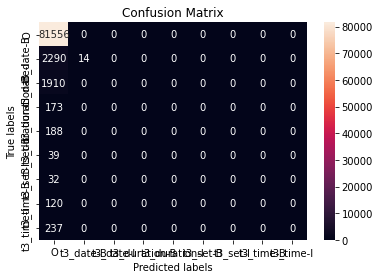

In [ ]:
run_logistic_regression(TRAIN_DATASET, TEST_DATASET, max_iteration_count=1_000, display_diagrams=True)

Run second model - neural netowrk with bidirectional LSTM.

First rows of train data:
   ORDER_ID  TOKEN_ID      ORTH     LEMMA     POS              CTAG LABEL
0         1         1       czy       czy     qub               qub     O
1         2         2   Wysokie    wysoki     adj  adj:sg:nom:n:pos     O
2         3         3  napięcie  napięcie   subst    subst:sg:nom:n     O
3         4         4         ?         ?  interp            interp     O
4         5         0  Ponieważ  ponieważ    comp              comp     O
First rows of test data:
   ORDER_ID  TOKEN_ID       ORTH      LEMMA    POS             CTAG LABEL
0    363367         1    pytanie    pytanie  subst   subst:sg:acc:n     O
1    363368         2          o          o   prep         prep:acc     O
2    363369         3         to         to  subst   subst:sg:acc:n     O
3    363370         4  spotkanie  spotkanie  subst   subst:sg:acc:n     O
4    363371         5   wiceszef   wiceszef  subst  subst:sg:nom:m1     O
Train ds values count:
O                354401
t3_date-I     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test values: ['O' 't3_date-B' 't3_date-I' 't3_duration-B' 't3_duration-I' 't3_set-B'
 't3_set-I' 't3_time-B' 't3_time-I']
Predicted values: ['O' 't3_date-B' 't3_date-I' 't3_duration-I' 't3_time-I']


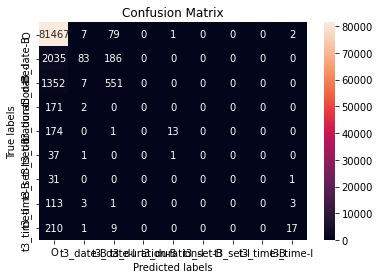

In [ ]:
run_nn(TRAIN_DATASET, TEST_DATASET, model_name='dense', epoch_count=25, display_diagrams=True)

Run third model - bidirectional lstm.

First rows of train data:
   ORDER_ID  TOKEN_ID      ORTH     LEMMA     POS              CTAG LABEL
0         1         1       czy       czy     qub               qub     O
1         2         2   Wysokie    wysoki     adj  adj:sg:nom:n:pos     O
2         3         3  napięcie  napięcie   subst    subst:sg:nom:n     O
3         4         4         ?         ?  interp            interp     O
4         5         0  Ponieważ  ponieważ    comp              comp     O
First rows of test data:
   ORDER_ID  TOKEN_ID       ORTH      LEMMA    POS             CTAG LABEL
0    363367         1    pytanie    pytanie  subst   subst:sg:acc:n     O
1    363368         2          o          o   prep         prep:acc     O
2    363369         3         to         to  subst   subst:sg:acc:n     O
3    363370         4  spotkanie  spotkanie  subst   subst:sg:acc:n     O
4    363371         5   wiceszef   wiceszef  subst  subst:sg:nom:m1     O
Train ds values count:
O                354401
t3_date-I     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test values: ['O' 't3_date-B' 't3_date-I' 't3_duration-B' 't3_duration-I' 't3_set-B'
 't3_set-I' 't3_time-B' 't3_time-I']
Predicted values: ['O' 't3_date-B' 't3_date-I' 't3_duration-I' 't3_time-I']


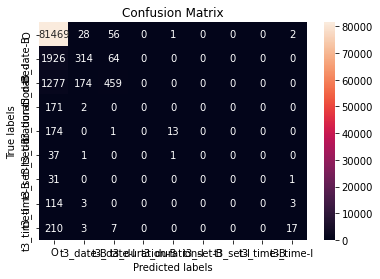

In [ ]:
run_nn(TRAIN_DATASET, TEST_DATASET, model_name='lstm', epoch_count=5, display_diagrams=True)

Run fourth model - crf.

First rows of train data:
   ORDER_ID  TOKEN_ID      ORTH     LEMMA     POS              CTAG LABEL
0         1         1       czy       czy     qub               qub     O
1         2         2   Wysokie    wysoki     adj  adj:sg:nom:n:pos     O
2         3         3  napięcie  napięcie   subst    subst:sg:nom:n     O
3         4         4         ?         ?  interp            interp     O
4         5         0  Ponieważ  ponieważ    comp              comp     O
First rows of test data:
   ORDER_ID  TOKEN_ID       ORTH      LEMMA    POS             CTAG LABEL
0    363367         1    pytanie    pytanie  subst   subst:sg:acc:n     O
1    363368         2          o          o   prep         prep:acc     O
2    363369         3         to         to  subst   subst:sg:acc:n     O
3    363370         4  spotkanie  spotkanie  subst   subst:sg:acc:n     O
4    363371         5   wiceszef   wiceszef  subst  subst:sg:nom:m1     O
Overall f1 score for whole dataset is 0.7370587747078274
    

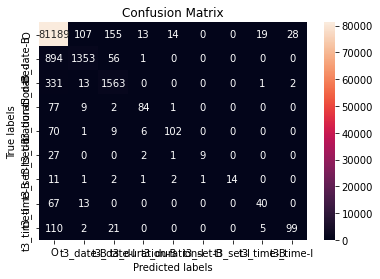

In [ ]:
run_crf(TRAIN_DATASET, TEST_DATASET, epoch_count=1000, display_diagrams=True, mode='all')